# 1. Data Collection and Preprocessing

In [9]:
!pip install yfinance
import yfinance as yf    #calls finance API for downloading daily stock prices

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------- -------------------------- 1.0/3.0 MB 4.6 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 3.9 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 3.8 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 2.5 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 2.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.9-py3-none-any.whl size=139095 sha256=403f8002f6df437b8eeec161111ceced758f245863e447492315ae54263eddc2
  Store

In [21]:
sp500 = yf.Ticker("^GSPC")  #enables us to download price history for a single symbol

In [23]:
sp500 = sp500.history(period="max")   #historical prices; retrieve all data from beginning when it was created
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,0.0,0.0
2025-03-11 00:00:00-04:00,5603.649902,5636.299805,5528.410156,5572.069824,6221240000,0.0,0.0
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,0.0,0.0


In [25]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-03-03 00:00:00-05:00', '2025-03-04 00:00:00-05:00',
               '2025-03-05 00:00:00-05:00', '2025-03-06 00:00:00-05:00',
               '2025-03-07 00:00:00-05:00', '2025-03-10 00:00:00-04:00',
               '2025-03-11 00:00:00-04:00', '2025-03-12 00:00:00-04:00',
               '2025-03-13 00:00:00-04:00', '2025-03-14 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24416, freq=None)

<Axes: xlabel='Date'>

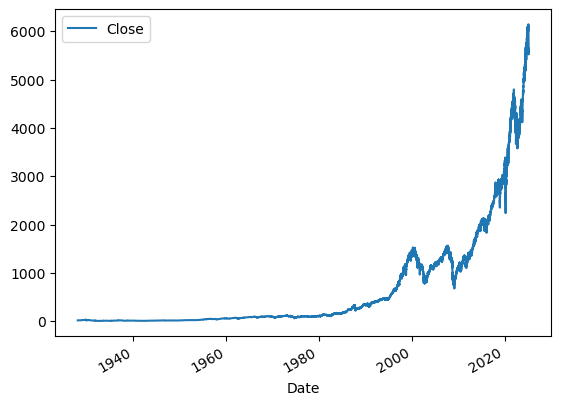

In [27]:
sp500.plot.line(y="Close", use_index=True)  #closing against index

In [29]:
del sp500["Dividends"]
del sp500["Stock Splits"]

# 2. Creating Target Variable for Prediction

In [34]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)  #tomorrow column created to predict tomorrow's prices

In [46]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,5572.069824,0
2025-03-11 00:00:00-04:00,5603.649902,5636.299805,5528.410156,5572.069824,6221240000,5599.299805,1
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,5521.520020,0


In [48]:
sp500 = sp500.loc["1990-01-01":].copy() # reviewing data before 1990
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,5572.069824,0
2025-03-11 00:00:00-04:00,5603.649902,5636.299805,5528.410156,5572.069824,6221240000,5599.299805,1
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,5521.520020,0


#Training an initial machine learning model

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,5521.520020,0
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,5638.939941,1
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,5675.120117,1


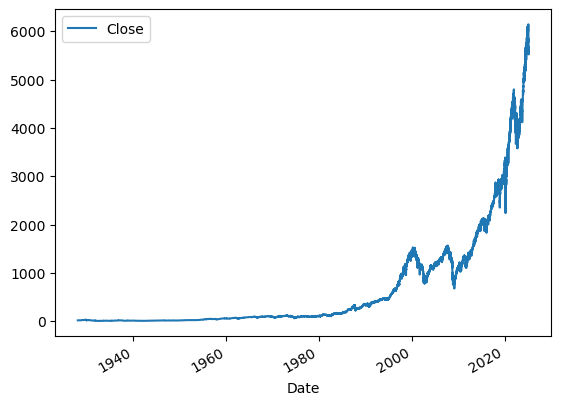

In [10]:
#!pip install yfinance
import yfinance as yf 
sp500 = yf.Ticker("^GSPC") 
sp500 = sp500.history(period="max")   #historical prices; retrieve all data from beginning when it was created
sp500
sp500.index
sp500.plot.line(y="Close", use_index=True) 
del sp500["Dividends"]
del sp500["Stock Splits"]
sp500["Tomorrow"] = sp500["Close"].shift(-1) 
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500
sp500 = sp500.loc["1990-01-01":].copy() # reviewing data before 1990
sp500

# 3. Training a Machine Learning Model

In [20]:
from sklearn.ensemble import RandomForestClassifier   #uses multiple decision trees to make predictions

model = RandomForestClassifier(n_estimators =100, min_samples_split=100, random_state = 1)
                            #create 100 decision trees, atleast 100 samples before it splits further, same random seed will generate same results
train = sp500.iloc[:-100]  #consists all rows except the last 100
test = sp500.iloc[-100:]   #consists of all last 100 rows

predictors = ["Close", "Volume", "Open","High","Low"]
model.fit(train[predictors],train["Target"])    #model learns patterns from the training data


RandomForestClassifier(min_samples_split=100, random_state=1)

In [30]:
from sklearn.metrics import precision_score   #measures accuracy of positive predictions

preds = model.predict(test[predictors])    # % of time we predicted that market will go up and it actually went up
       #predict() method takes the test dataset  and generates prediction whether the market will go up or down

import pandas as pd
preds = pd.Series(preds, index=test.index) #The preds array will contain predicted values (e.g., 0 for "market down" and 1 for "market up")
preds

Date
2024-10-22 00:00:00-04:00    0
2024-10-23 00:00:00-04:00    1
2024-10-24 00:00:00-04:00    1
2024-10-25 00:00:00-04:00    1
2024-10-28 00:00:00-04:00    1
                            ..
2025-03-12 00:00:00-04:00    0
2025-03-13 00:00:00-04:00    0
2025-03-14 00:00:00-04:00    0
2025-03-17 00:00:00-04:00    0
2025-03-18 00:00:00-04:00    0
Length: 100, dtype: int32

In [32]:
precision_score(test["Target"],preds)   #compare actual values(test["target"]) with predicted values (preds)

0.5555555555555556

<Axes: xlabel='Date'>

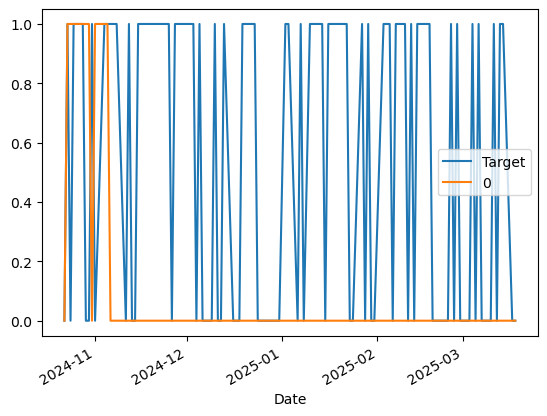

In [36]:
combined = pd.concat([test["Target"],preds],axis=1) #(axis=1) Specifies that the concatenation should be done column-wise
combined.plot()

# 4. Creating a Prediction Function


In [60]:
def predict(train, test, predictors, model):          #The predict() function is designed to train a machine learning model using the training dataset (train), make predictions on the test dataset (test), and return a DataFrame containing both actual and predicted values.
    model.fit(train[predictors],train["Target"])      #.fit(x,y) The model learns patterns from X (features) to predict y (target). 
    preds = model.predict(test[predictors])           #.predict() outputs predictions for x
    preds = pd.Series(preds, index=test.index, name="Predictions")        #Converts preds (a NumPy array) into a Pandas Series for easier manipulation.(index=test.index) Ensures that predictions match the original test dataset's index. 
    combined = pd.concat([test["Target"],preds],axis=1)
    return combined

# 5. Backtesting model

In [62]:
#The backtest() function simulates a rolling backtesting process. It evaluates a machine learning model's performance over time by training it on past data and testing it on unseen future data in chunks.
def backtest(data, model, predictors, start=2500, step=250):  #(start=x) irst 2500 rows are used for training initially. (step=250) The number of rows to add in each step 
    all_predictions = []                                      #initializing an empty list
    for i in range(start, data.shape[0], step):               #Iterates over the dataset from row start=2500 to the end (data.shape[0]). Moves forward in steps of 250 rows.
        train = data.iloc[0:i].copy()                         #.iloc helps split the dataset into training and testing sets based on row numbers.
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)                   #Each iteration’s predictions are stored in the list.
    return pd.concat(all_predictions)

In [64]:
predictions = backtest(sp500, model, predictors)

In [65]:
predictions["Predictions"].value_counts()

Predictions
0    3730
1    2639
Name: count, dtype: int64

In [66]:
precision_score(predictions["Target"],predictions["Predictions"])

0.52860932171277

In [67]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535877
0    0.464123
Name: count, dtype: float64

# 6. Adding Technical Indicators (Rolling Averages)

In [74]:
horizons = [2,5,60,250,1000] # It is number of past days. Ratio of todays closing price and the closing prices on that days.
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean() # (.rolling(horizon)) to compute the moving average of stock prices over horizon days. The .mean() function calculates the average closing price over that period.

    ratio_column = f"Close_Ratio_{horizon}"     # Close_Ratio_{horizon} that stores the ratio of the current closing price to its rolling average. This helps in identifying overbought/oversold conditions
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] 

    #Close_Ratio_2	Current Close price ÷ 2-day rolling average
    #Trend_2	    Sum of Target values over the last 2 days
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]  #Shifts the entire dataset one day back to avoid data leakage. .rolling(horizon).sum()["Target"] → Computes the sum of Target values over horizon days.
    new_predictors += [ratio_column, trend_column] #Adds the newly created column names to new_predictors, which will later be used for training the model.

In [82]:
sp500 = sp500.dropna()  #as the values before 1993 where mostly null. It requires 4 years to actually predict
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-12 00:00:00-04:00,5624.839844,5642.189941,5546.089844,5599.299805,5219830000,5521.520020,0,1.002437,1.0,0.989463,2.0,0.938958,29.0,0.995717,140.0,1.210871,527.0
2025-03-13 00:00:00-04:00,5594.450195,5597.779785,5504.649902,5521.520020,5018980000,5638.939941,1,0.993006,1.0,0.983259,2.0,0.927288,29.0,0.981637,140.0,1.193636,527.0
2025-03-14 00:00:00-04:00,5563.850098,5645.270020,5563.850098,5638.939941,4863180000,5675.120117,1,1.010521,1.0,1.008885,2.0,0.948101,30.0,1.002164,141.0,1.218572,527.0


# 7. Improving Predictions with Probability Threshold

In [5]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)   #(n_estimators)=200 200 decision trees ,  (min_samples_split=50) A node in a tree must have at least 50 samples to be split further. (random_state=1) Ensures reproducibility by using a fixed seed.

In [19]:
#predict() directly returns 0 or 1, without probability information. predict_proba() lets us set a custom threshold (0.6 instead of 0.5) to control sensitivity.
#Trains the model using the training dataset. Predicts probabilities for the test dataset. Applies a threshold of 0.6 to classify predictions as 1 (positive) or 0 (negative).

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]    #predict_proba() returns probability estimates instead of direct class predictions.[:,1] selects only the probability of the positive class (1).

    preds[preds >= .6] = 1    #If the probability ≥ 0.6, classify it as 1 (positive class).
    preds[preds < .6] = 0     #If the probability < 0.6, classify it as 0 (negative class).
    preds = pd.Series(preds, index=test.index , name="Predictions")   #Converts predictions into a Pandas Series with the same index as the test data.Helps in matching predictions with actual values.
    combined = pd.concat([test["Target"],preds], axis=1)              #Combines the actual values (Target) and the predicted values (Predictions) into a single DataFrame for analysis.
    return combined
    

In [20]:
predictions = backtest(sp500, model, new_predictors) 

In [21]:
predictions["Predictions"].value_counts()

Predictions
0.0    4502
1.0     867
Name: count, dtype: int64

In [13]:
 precision_score(predictions["Target"], predictions["Predictions"])

0.52860932171277